# Guided Filter Image Denoising

In [1]:
from guided_filter.core.filters import FastGuidedFilter, GuidedFilter
from guided_filter.io_util.image import loadRGB
from guided_filter.cv.image import to32F
import guided_filter
import cv2
import numpy as np
import time
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import os
import time

start_time = time.time()

#path to images to input
inputPath = "images"

# read in images from folder and input into array
images = []

for file in os.listdir(inputPath):
    img = np.float32(cv2.imread(os.path.join(inputPath, file), 1))
    
    # Convert the image to float32 for guided filter
    floatImg = img.astype(np.float32) / 255.0
    # Convert to grayscale for guided filter (if necessary)
    gray = cv2.cvtColor(floatImg, cv2.COLOR_BGR2GRAY)

    # Set the parameters for the guided filter
    radius = 10
    eps = 0.2

    # Create a GuidedFilter object
    guided_filter = GuidedFilter(gray, radius, eps)

    # Apply guided filter
    guided_filtered = guided_filter.filter(floatImg)
    
    img = guided_filtered * 255
    final = img.astype(np.uint8)
    
    filename = file.replace(".tif", "")
    if img is not None:
        images.append((filename, final))

for n in range(0, len(images)):
    cv2.imwrite(f'guided_{images[n][0]}.png',images[n][1])


print("Denoising Complete!")
print("--- %s seconds ---" % (time.time() - start_time))


C:\Users\wammi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Denoising Complete!
--- 17.602007389068604 seconds ---


In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing images
folder_path = 'guided filtered images'

# Output folder for saving thresholded images
output_folder = 'guided binary images'

# Threshold value (adjust as needed)
threshold_value = 27

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each file in the folder
for filename in os.listdir('guided filtered images'):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.tif')):
        # Load an image using OpenCV
        image_path = os.path.join(folder_path, filename)
        original_image = cv2.imread(image_path, 0)

        # Apply thresholding to get a binary image
        _, binary_image = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY)
        
        # Save the binary image
        newName = filename.replace(".tif", "")
        newName = newName.replace("denoised_", "")
        output_path = os.path.join(output_folder, f'{newName}_binary.png')
        cv2.imwrite(output_path, binary_image)

        # Plot the histogram of the binary image
        binary_histogram, binary_bins = np.histogram(binary_image.flatten(), 2, [0, 256])
        plt.bar(binary_bins[:-1], binary_histogram, width=1, color='black')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title(f'Binary Image Histogram - {newName}')
        
        output_path = os.path.join('guided binary histograms', f'{newName}_binaryHist.png')
        plt.savefig(output_path)
        plt.close()

print("Complete!")


Complete!


# Build the Dataframe

In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Path to the folder containing binary images
folder_path = 'guided binary images'
dayList = ['Day 3', 'Day 5', 'Day 5', 'Day 7', 'Day  15']
woundLocs = ['L1', 'L2', 'C1', 'C2', 'C3', 'C4', 'C5', 'R1', 'R2']
listDaysFile = ['D3', 'D5', 'D7', '15']

data = {}
for day in listDaysFile:
    dayDict = {}
    for loc in woundLocs:
        dayDict[loc] = 0
    data[day] = dayDict

for filename in os.listdir(folder_path):
    if '1323F' in filename:
        for day in listDaysFile:
            for loc in woundLocs:
                if day in filename and loc in filename:
                    image_path = os.path.join(folder_path, filename)
                    binary_image = cv2.imread(image_path, 0)

                    # Find the total number of white pixels
                    whitePixel = cv2.countNonZero(binary_image)
                    imgSize = binary_image.size

                    #calcualte the density
                    density = whitePixel/imgSize

                    data[day][loc] = whitePixel
                    
data_dict = data

# Path to the folder containing binary images
folder_path = 'guided binary images'
#dayList = ['Day 3', 'Day 5', 'Day 5', 'Day 7', 'Day  15']
woundLocs = ['L1', 'L2', 'C1', 'C2', 'C3', 'C4', 'C5', 'R1', 'R2']
listDaysFile = ['D3', 'D5', 'D7', 'D15']

data = {}
for day in listDaysFile:
    dayDict = {}
    for loc in woundLocs:
        dayDict[loc] = 0
    data[day] = dayDict

for filename in os.listdir(folder_path):
    if '1324F' in filename:
        for day in listDaysFile:
            for loc in woundLocs:
                if day in filename and loc in filename:
                    image_path = os.path.join(folder_path, filename)
                    binary_image = cv2.imread(image_path, 0)

                    # Find the total number of white pixels
                    whitePixel = cv2.countNonZero(binary_image)
                    imgSize = binary_image.size

                    #calcualte the density
                    density = whitePixel/imgSize

                    data[day][loc] = whitePixel
                    
pig_1324F_dict = data

# Path to the folder containing binary images
folder_path = 'guided binary images'
dayList = ['Day 3', 'Day 5', 'Day 5', 'Day 7', 'Day  15']
woundLocs = ['L1', 'L2', 'C1', 'C2', 'C3', 'C4', 'C5', 'R1', 'R2']
listDaysFile = ['D3', 'D5', 'D7', 'D15']

data = {}
for day in listDaysFile:
    dayDict = {}
    for loc in woundLocs:
        dayDict[loc] = 0
    data[day] = dayDict

for filename in os.listdir(folder_path):
    if '1325F' in filename:
        for day in listDaysFile:
            for loc in woundLocs:
                if day in filename and loc in filename:
                    image_path = os.path.join(folder_path, filename)
                    binary_image = cv2.imread(image_path, 0)

                    # Find the total number of white pixels
                    whitePixel = cv2.countNonZero(binary_image)
                    imgSize = binary_image.size

                    #calcualte the density
                    density = whitePixel/imgSize

                    data[day][loc] = whitePixel
                    
pig_1325F_dict = data


{'D3': {'L1': 235, 'L2': 1213, 'C1': 3984, 'C2': 784, 'C3': 0, 'C4': 0, 'C5': 0, 'R1': 0, 'R2': 0}, 'D5': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 4199, 'C4': 1106, 'C5': 0, 'R1': 2510, 'R2': 823}, 'D7': {'L1': 0, 'L2': 0, 'C1': 1073, 'C2': 13301, 'C3': 3959, 'C4': 190, 'C5': 0, 'R1': 0, 'R2': 0}, '15': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 84, 'C4': 578, 'C5': 0, 'R1': 1243, 'R2': 1349}}
{'D3': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 2537, 'C4': 2213, 'C5': 0, 'R1': 3322, 'R2': 198}, 'D5': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 1948, 'C4': 1689, 'C5': 0, 'R1': 4906, 'R2': 1013}, 'D7': {'L1': 2923, 'L2': 3965, 'C1': 8561, 'C2': 6818, 'C3': 0, 'C4': 0, 'C5': 0, 'R1': 0, 'R2': 0}, 'D15': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 3052, 'C4': 1577, 'C5': 0, 'R1': 2254, 'R2': 3546}}
{'D3': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 0, 'C4': 185, 'C5': 0, 'R1': 128, 'R2': 4106}, 'D5': {'L1': 0, 'L2': 0, 'C1': 12141, 'C2': 2310, 'C3': 48361, 'C4': 543, 'C5': 0, 'R1': 0, 'R2': 0

# Plot

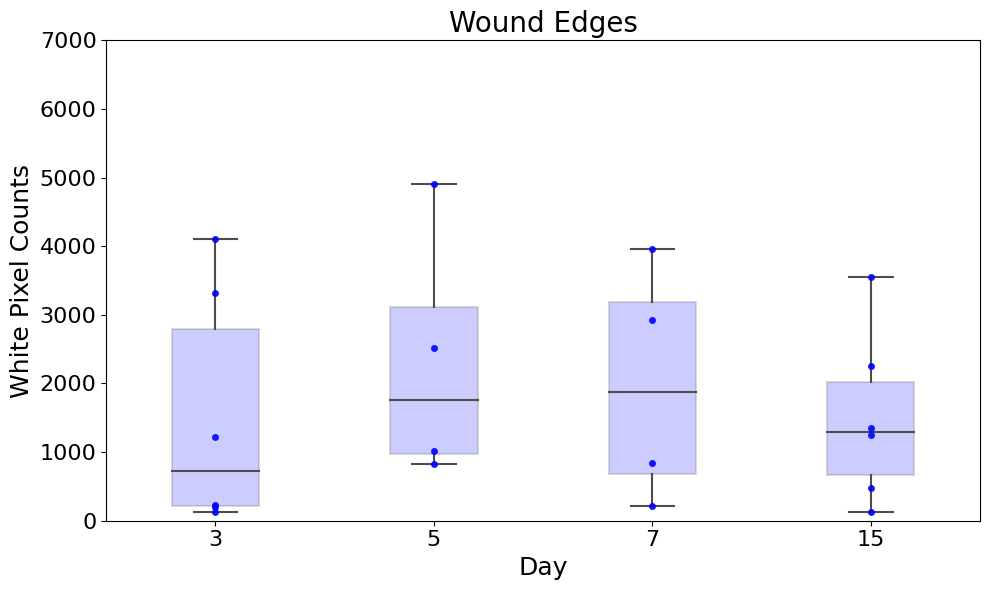

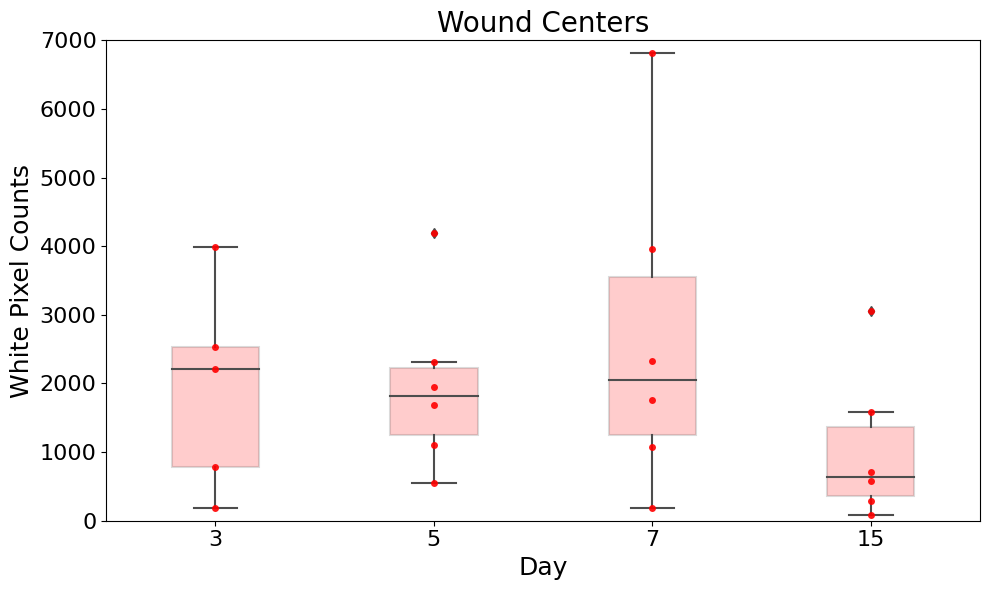

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# outliers
# 1325F D5 C3
# 1323F D7 C2
# 1325F D5 C1
# 1324F D7 C1

#input dataset from previous code
data_dict = {'D3': {'L1': 235, 'L2': 1213, 'C1': 3984, 'C2': 784, 'C3': 0, 'C4': 0, 'C5': 0, 'R1': 0, 'R2': 0}, 'D5': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 4199, 'C4': 1106, 'C5': 0, 'R1': 2510, 'R2': 823}, 'D7': {'L1': 0, 'L2': 0, 'C1': 1073, 'C2': 0, 'C3': 3959, 'C4': 190, 'C5': 0, 'R1': 0, 'R2': 0}, '15': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 84, 'C4': 578, 'C5': 0, 'R1': 1243, 'R2': 1349}}
pig_1324F_dict = {'D3': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 2537, 'C4': 2213, 'C5': 0, 'R1': 3322, 'R2': 198}, 'D5': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 1948, 'C4': 1689, 'C5': 0, 'R1': 4906, 'R2': 1013}, 'D7': {'L1': 2923, 'L2': 3965, 'C1': 0, 'C2': 6818, 'C3': 0, 'C4': 0, 'C5': 0, 'R1': 0, 'R2': 0}, 'D15': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 3052, 'C4': 1577, 'C5': 0, 'R1': 2254, 'R2': 3546}}
pig_1325F_dict = {'D3': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 0, 'C4': 185, 'C5': 0, 'R1': 128, 'R2': 4106}, 'D5': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 2310, 'C3': 0, 'C4': 543, 'C5': 0, 'R1': 0, 'R2': 0}, 'D7': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 1763, 'C4': 2324, 'C5': 0, 'R1': 837, 'R2': 212}, 'D15': {'L1': 0, 'L2': 0, 'C1': 0, 'C2': 0, 'C3': 706, 'C4': 291, 'C5': 0, 'R1': 475, 'R2': 122}}

#create dataframe for each day
data = []
for day, locations in data_dict.items():
    for location, count in locations.items():
        data.append(['1323F', day, location, count])

df = pd.DataFrame(data, columns=['Pig', 'Day', 'WoundLocation', 'Counts'])



data_2 = []
for day, locations in pig_1324F_dict.items():
    for location, count in locations.items():
        data_2.append(['1324F', day, location, count])
        
        
df2 = pd.DataFrame(data_2, columns=['Pig', 'Day', 'WoundLocation', 'Counts'])



data_3 = []
for day, locations in pig_1325F_dict.items():
    for location, count in locations.items():
        data_3.append(['1325F', day, location, count])
        
        
df3 = pd.DataFrame(data_3, columns=['Pig', 'Day', 'WoundLocation', 'Counts'])

#combine dataframes
df_combined = pd.concat([df, df2, df3], ignore_index=True)
df_combined = df_combined[df_combined['Counts'] != 0]


df_combined['Day'] = df_combined['Day'].replace('15', 'D15')
df_combined['Day'] = df_combined['Day'].str.extract('(\d+)').astype(int)


df_edge = df_combined[df_combined['WoundLocation'].isin(['L1', 'L2', 'R1', 'R2'])]
df_center = df_combined[~df_combined['WoundLocation'].isin(['L1', 'L2', 'R1', 'R2'])]

#plot box plots of dataframe
plt.figure(figsize=(10, 6)) 
ax = sns.boxplot(x='Day', y='Counts', data=df_edge, color='grey', width=0.4, boxprops=dict(facecolor='blue', alpha=0.2))
sns.stripplot(x='Day', y='Counts', data=df_edge, color='blue', alpha=0.9, ax=ax, jitter=False)

plt.title('Wound Edges', fontsize = 20)
plt.xlabel('Day', fontsize = 18)
ax.set_ylim([0, 7000])
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.ylabel('White Pixel Counts', fontsize = 18)
plt.tight_layout()

#save wound edges plot
plt.savefig('Pixel Count Edges.jpg')

plt.figure(figsize=(10, 6)) 
ax = sns.boxplot(x='Day', y='Counts', data=df_center, color='grey', width=0.4, boxprops=dict(facecolor='red', alpha=0.2))
sns.stripplot(x='Day', y='Counts', data=df_center, color='red', alpha=0.9, ax=ax, jitter=False)
plt.title('Wound Centers', fontsize = 20)
plt.xlabel('Day', fontsize = 18)
ax.set_ylim([0, 7000])
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.ylabel('White Pixel Counts', fontsize = 18)
plt.tight_layout()

#save wound centers plot
plt.savefig('Pixel Count Centers.jpg')
